# 6th Question

### Which country has produced the most successful tennis players?

Installing needed packages

In [40]:
%pip install numpy pandas seaborn pyarrow

Note: you may need to restart the kernel to use updated packages.


Importing needed packages

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import os

# Reading .parquet data
According to question and ERD in /data/ERD folder as Tennis Schema.pdf , We are analyzing and Reading data of matchs
It might take few seconds to read data

In [4]:
days_to_query = os.listdir("../data/raw/tennis_data")
files_to_load = []

for day in days_to_query:
    files_to_load.extend(
        glob(
            f"../data/raw/tennis_data/{day}/data/raw/raw_statistics*/statistics_*.parquet"
        )
    )

tennis_statistics_data_frame = pd.concat(
    [
        pd.read_parquet(
            file,
            columns=[
                "match_id",
                "period",
                "statistic_name",
                "home_stat",
                "away_stat",
                "home_total",
                "away_total",
            ],
        )
        for file in files_to_load
    ],
    ignore_index=True,
)

Reading data of home matches required information :

In [ ]:
days_to_query_home = os.listdir("../data/raw/tennis_data")
files_to_load_home = []

for day in days_to_query_home:
    files_to_load_home.extend(
        glob(f"../data/raw/tennis_data/{day}/data/raw/raw_match*/home_team_1*.parquet")
    )

home_statistics_data_frame = pd.concat(
    [
        pd.read_parquet(
            file,
            columns=["match_id", "name", "current_rank", "current_prize", "residence"],
        )
        for file in files_to_load_home
    ],
    ignore_index=True,
)

Reading data of away matches required information :

In [19]:
days_to_query_away = os.listdir("../data/raw/tennis_data")
files_to_load_away = []

for day in days_to_query_away:
    files_to_load_away.extend(
        glob(f"../data/raw/tennis_data/{day}/data/raw/raw_match*/away_team_1*.parquet")
    )

away_statistics_data_frame = pd.concat(
    [
        pd.read_parquet(
            file,
            columns=["match_id", "name", "current_rank", "current_prize", "residence"],
        )
        for file in files_to_load_away
    ],
    ignore_index=True,
)

# Cleaning whole data

In [21]:
home_statistics_data_frame.sort_values(by="current_rank", inplace=True)
home_statistics_data_frame.drop_duplicates(subset="match_id", inplace=True)
home_statistics_data_frame

,match_id,name,current_rank,current_prize,residence
6310,12049683,Świątek I.,1,577399,None
8239,12067249,Świątek I.,1,1013637,None
17081,12109939,Djokovic N.,1,796388,"Monte Carlo, Monaco"
22916,12156293,Świątek I.,1,2062757,None
23363,12156302,Świątek I.,1,2062757,None
...,...,...,...,...,...
25139,12209809,Kashyap H.,None,None,None
25471,12211401,Bougrat M.,None,1837,None
25500,12211579,Krznarić N.,None,31,None
25551,12211947,Eto N.,None,613,None


In [22]:
away_statistics_data_frame.sort_values(by="current_rank", inplace=True)
away_statistics_data_frame.drop_duplicates(subset="match_id", inplace=True)
away_statistics_data_frame

,match_id,name,current_rank,current_prize,residence
22530,12157170,Sinner J.,2,3301073,"Monte Carlo, Monaco"
18576,12110004,Alcaraz C.,2,375833,"El Palmar, Murcia, Spain"
16162,12110015,Alcaraz C.,2,375833,"El Palmar, Murcia, Spain"
18577,12110007,Alcaraz C.,2,375833,"El Palmar, Murcia, Spain"
6917,12067245,Sabalenka A.,2,1848643,Belarus
...,...,...,...,...,...
24089,12211398,Liauw A Fong N.,None,3630,None
24093,12211485,Collins A.,None,818,None
24099,12211561,Baidaulet D.,None,None,None
24176,12212015,Simonsson F.,None,215,"Stockholm, Sweden"


Based on "current_rank" in ERD , I'll analyze data with "current_rank" and Players information

Reading data of players information

In [ ]:
combined_df = pd.concat(
    [home_statistics_data_frame, away_statistics_data_frame], ignore_index=True
)
unique_df = combined_df.drop_duplicates()
sorted_df = unique_df.sort_values(by="current_rank")
sorted_df

,match_id,name,current_rank,current_prize,residence
0,12049683,Świątek I.,1,577399,None
19,12110072,Świątek I.,1,1146090,None
18,12110074,Świątek I.,1,2062757,None
16,12049670,Świątek I.,1,577399,None
15,12067252,Świątek I.,1,1013637,None
...,...,...,...,...,...
24074,12211398,Liauw A Fong N.,None,3630,None
24075,12211485,Collins A.,None,818,None
24076,12211561,Baidaulet D.,None,None,None
24077,12212015,Simonsson F.,None,215,"Stockholm, Sweden"


Based on first Missing Values , I had to search my self about player named : Swiatek I.\
She is from Poland \
Adding to data

In [ ]:
sorted_df.loc[sorted_df["name"] == "Świątek I.", "residence"] = "Poland"
sorted_df

,match_id,name,current_rank,current_prize,residence
0,12049683,Świątek I.,1,577399,Poland
19,12110072,Świątek I.,1,1146090,Poland
18,12110074,Świątek I.,1,2062757,Poland
16,12049670,Świątek I.,1,577399,Poland
15,12067252,Świątek I.,1,1013637,Poland
...,...,...,...,...,...
24074,12211398,Liauw A Fong N.,None,3630,None
24075,12211485,Collins A.,None,818,None
24076,12211561,Baidaulet D.,None,None,None
24077,12212015,Simonsson F.,None,215,"Stockholm, Sweden"


# Plot Top-10 Countries in Tennis Champions data in Seaborn Library

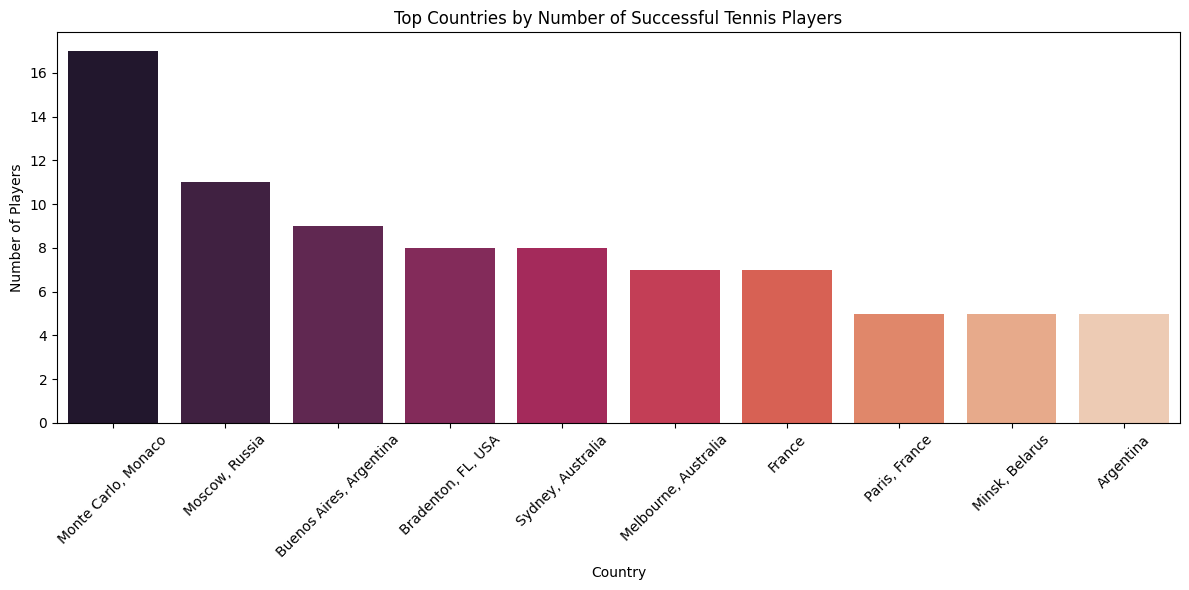

In [ ]:
unique_players = sorted_df.drop_duplicates(subset=["name", "residence"])

country_counts = unique_players["residence"].value_counts().reset_index()
country_counts.columns = ["Country", "Number of Players"]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_counts.head(10),
    x="Country",
    y="Number of Players",
    hue="Country",
    palette="rocket",
    legend=False,
)

plt.title("Top Countries by Number of Successful Tennis Players")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()